## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


### Project Overview

For this project, you will use exploratory data analysis to generate insights for a business stakeholder.

Descriptive analysis of some movies had achieved high Box office earnings. The outcome data shows three recommandations,Microsoft Company can use this analysis to decide how to produce a successful movie.

### Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

This analysis will answer the following questions:


### Data Understanding
In the folder zippedData are movie datasets from:
- [Box Office Mojo](https://www.boxofficemojo.com/)
- [IMDB](https://www.imdb.com/)
- [Rotten Tomatoes](https://www.rottentomatoes.com/)
- [TheMovieDB](https://www.themoviedb.org/)
- [The Numbers](https://www.the-numbers.com/)

I have modified the structure and contents of the dataset somewhat for the purposes of this project. The different files have different formats. Some are compressed CSV (comma-separated values) or TSV (tab-separated values) files that can be opened using spreadsheet software or pd.read_csv, while the data from IMDB is located in a SQLite database.This Is the ERD of the database

![movie data erd](https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-1-project-v2-4/master/movie_data_erd.jpeg)

In [2]:
# Import relevant packages
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import seaborn as sns
import sqlite3


#### IMDb Dataset

IMDb Movie Database is an online database containing information and statistics about movies.This database is accessed in this analysis using SQLite, so it had to be unzipped and then I performed queries to get my results. 

In [3]:
# Connect IMdb database to sqlite3
conn= sqlite3.connect("zippedData/im.db")


In [4]:
#Getting a sense of the database's tables by turning them into a DataFrame:
df = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [5]:
#Turning the movie_basics table into a DataFrame:
df1 = pd.read_sql("""SELECT * FROM movie_basics;""", conn)

In [6]:
# Look at the information of df
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


original_title, runtime_minutes and genres have null values

In [7]:
# Find the summary statistics of df1
df1.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [8]:
#Turning the movie_ratings table into a DataFrame:
df2 = pd.read_sql("""SELECT * FROM movie_ratings;""", conn)

In [9]:
# Getting the information of df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [10]:
# Getting the summary statistics of df2
df.describe()

,name
count,8
unique,8
top,movie_basics
freq,1


In [11]:
merged_df = pd.read_sql("""
SELECT *
                        FROM movie_basics
                        JOIN movie_ratings
                        USING(movie_id);""",conn)
merged_df 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


#### Reading of the datasets

#### Budgets Dataset

In [12]:
# Reading the movie_datsets dataframe
budgets = pd.read_csv("zippedData/tn.movie_budgets.csv")
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


This will be a very important and heavily used dataframe as it contains the worldwide gross, our measuring stick of success 

In [13]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


#### The Ratings dataset and revies dataset

In [14]:
ratings= pd.read_csv("zippedData/rt.movie_info.tsv",sep ='\t')

reviews = pd.read_csv("zippedData/rt.reviews.tsv", sep= '\t',encoding= 'latin1')
df_gross = pd.read_csv('ZippedData/bom.movie_gross.csv')

### Data Cleaning

Cheking for null values if any

In [15]:
# Cecking for null values in  the 

print("df2:",df_gross.isna().sum(),"/n")
print("df2:",merged_df.isna().sum(),"/n")
print()
print("ratings:",ratings.isna().sum(),"/n")
print()
print("reviews:",reviews.isna().sum(),"/n")


df2: title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64 /n
df2: movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64 /n

ratings: id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64 /n

reviews: id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64 /n


Removing null values

Merged_df

In [16]:
#  Removing null values and duplicates from df1
merged_df.dropna(inplace =True)
# Removing duplicate values in df1
merged_df.drop_duplicates(inplace =True)

df2

Reviews dataset

In [17]:
reviews.info()
# Dropppng null values
reviews.dropna(inplace= True)
# Removing duplicate values
reviews.drop_duplicates(inplace =True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


ratings dataset

In [18]:

# Dropppng columns with null values more than half the records 
ratings.drop(columns=["currency","box_office","studio"], axis = 1, inplace =True)
# reviews.dropna(inplace= True)
# Removing duplicate values
# reviews.drop_duplicates(inplace =True)

In [19]:
# Removing all dupicates and null values from ratings
ratings.dropna(inplace= True)
ratings.drop_duplicates(inplace =True)

Budgets

Removing null values and duplicates from budgets

In [20]:
# dfbudgets.dropna(inplace)
formatted_movie_budgets_df = budgets.copy() # Creating a copy to format
# Dropping duplicates
formatted_movie_budgets_df = formatted_movie_budgets_df.drop_duplicates() 

More data cleaning

In [21]:
# Dropping domestic gross since we don't use it for our visualization
formatted_movie_budgets_df.drop('domestic_gross', axis=1, inplace=True)

In [22]:
# Setting the release_date to a datetime format 
formatted_movie_budgets_df['release_date'] = pd.to_datetime(formatted_movie_budgets_df['release_date'])

In [23]:
# Formatting the numbers
for r in ['production_budget', 'worldwide_gross']:
    # Removes $ symbol amd ,
    formatted_movie_budgets_df[r] = formatted_movie_budgets_df[r].str.replace('$', '').str.replace(',', '') 
    formatted_movie_budgets_df[r] = formatted_movie_budgets_df[r].astype(np.int64) # Converts from object (str) to int64
    # Divides by 100,000,000 to make it easier for the visualization
    formatted_movie_budgets_df[r] = formatted_movie_budgets_df[r]/100000000 

In [24]:
# Adding a release month column for our visualization
formatted_movie_budgets_df['release_month'] = formatted_movie_budgets_df['release_date'].dt.month_name()

In [25]:
merged_df.head()   #Reviewing the structure of merged df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263


In [26]:
merged_df["primary_title"].value_counts()

primary_title
The Return            10
Lucky                  9
Broken                 8
Rage                   8
Homecoming             8
                      ..
Heavy Metal Horror     1
Driving Blind          1
Zhazhda                1
Terror Island          1
Sokagin Çocuklari      1
Name: count, Length: 62444, dtype: int64

Next I will want to split up the genres into a more workable format for ME. From "Action, Adventure, Fantasy" as one string to having each genre listed by itself

In [27]:
merged_df['genres'] = merged_df['genres'].str.split(',') # Splits the data by the ,
# creates multiple entries with each entry being linked to the seperated genres
formatted_genres_df = merged_df.explode('genres') 
formatted_genres_df.head(20) # Previewing the results of the split/explode

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,7.2,43
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Comedy,6.5,119
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Drama,6.5,119
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Fantasy,6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,Adventure,8.1,263


In [35]:
# Checking how many listings of each genre there are
all_genres = formatted_genres_df['genres'].value_counts().head(10)

Merging  formatted_movie_budgets_df and merged _df

In [29]:
# Renaming a column for the sake of making the merge easier
formatted_movie_budgets_df.rename(columns = {'movie':'primary_title'}, inplace = True)

In [30]:
# Merging the two dfs
formatted_genres_with_gross = formatted_genres_df.merge(formatted_movie_budgets_df, on='primary_title')

In [31]:
# dropping a superfluous column
formatted_genres_with_gross.drop('start_year', axis=1, inplace=True)


###  Visualizations

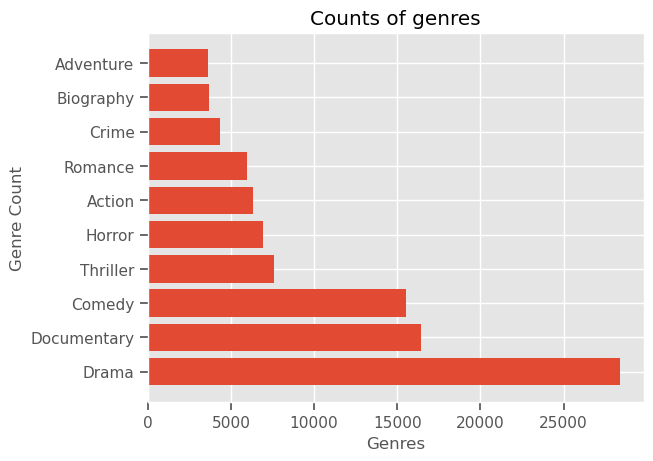

In [39]:
plt.style.use("ggplot")
plt.barh(all_genres.index, all_genres.values)
plt.title("Counts of genres")
plt.xlabel("Genres")
plt.ylabel("Genre Count")
sns.set_context("notebook");

Drama,Documentary,and comedy are the top three most popular genres

#### Production budget vs.Worldwide profit

In [44]:
formatted_movie_budgets_df.head()

,id,release_date,primary_title,production_budget,worldwide_gross,release_month
0,1,2009-12-18,Avatar,4.250,27.763453,December
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,4.106,10.456639,May
2,3,2019-06-07,Dark Phoenix,3.500,1.497623,June
3,4,2015-05-01,Avengers: Age of Ultron,3.306,14.030140,May
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,3.170,13.167217,December


In [45]:
# Getting the correlation between worldwide gross and production budget
formatted_movie_budgets_df[['worldwide_gross', 'production_budget']].corr()

,worldwide_gross,production_budget
worldwide_gross,1.000000,0.748306
production_budget,0.748306,1.000000


Worldwide gross has a high positive correlation with production budget

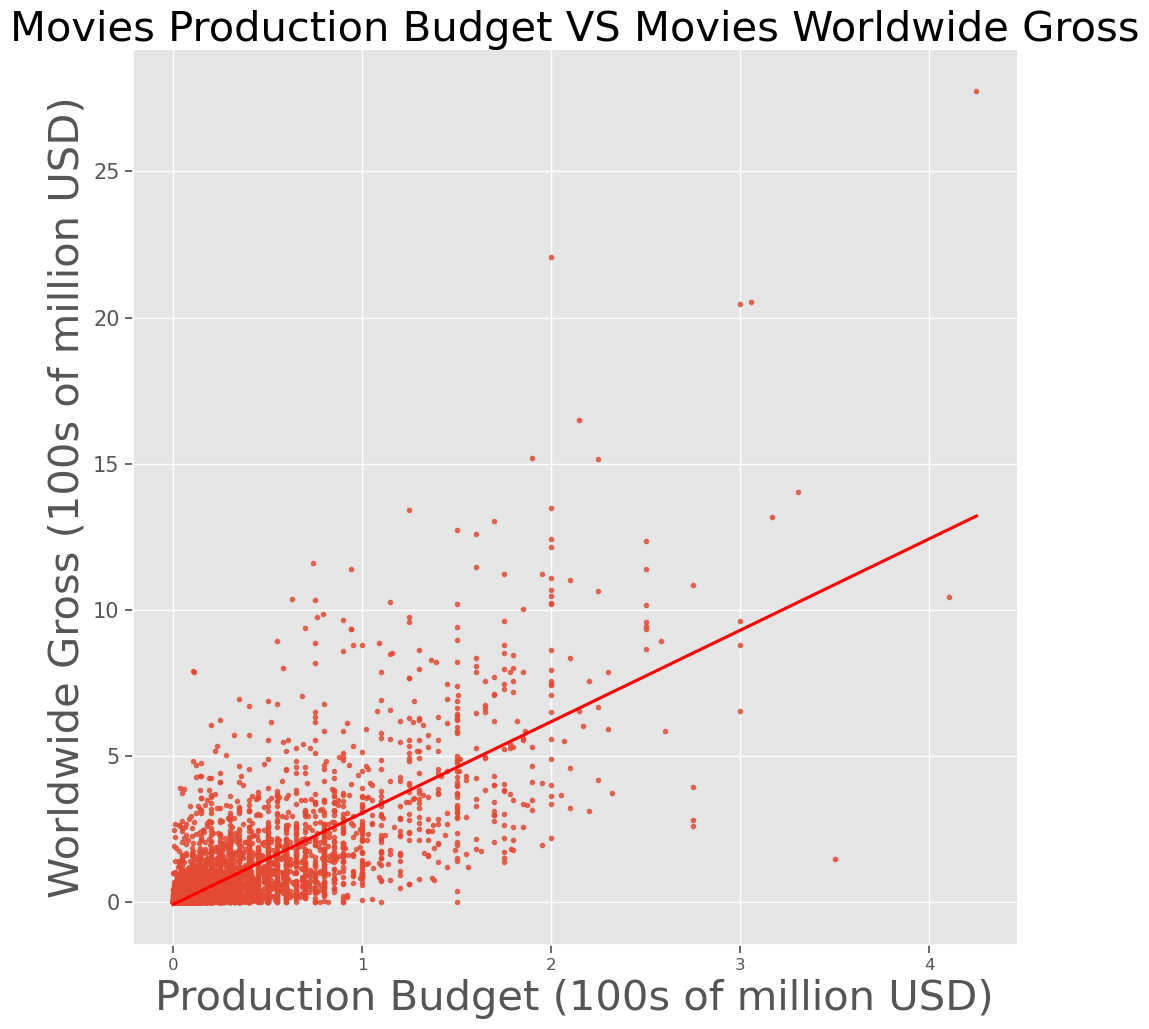

In [46]:
# Plotting and some basic formatting
sns.lmplot(x='production_budget', 
           y='worldwide_gross', 
           data=formatted_movie_budgets_df, 
           line_kws = {'color': 'red'}, 
           height=10, 
           markers = '.', 
           ci=1)
plt.title('Movies Production Budget VS Movies Worldwide Gross') # Sets title
plt.ylabel('Worldwide Gross (100s of million USD)') # Sets y label
plt.xlabel('Production Budget (100s of million USD)'); # Sets x label. Include ; at the end to remove superfluous information

There is a positive correlation between production budget and worldwide grss.I would recommend Microsft to budget for genres that require high budget


In [51]:
# lets see how popular movies are grouped by genres
group_by_genre =formatted_genres_df.groupby('genres')["averagerating"].mean()
group_by_genre_sort = group_by_genre.sort_values(ascending=False).head()
group_by_genre_sort


genres
Short          8.800000
Documentary    7.316787
Game-Show      7.300000
News           7.278783
Biography      7.169185
Name: averagerating, dtype: float64

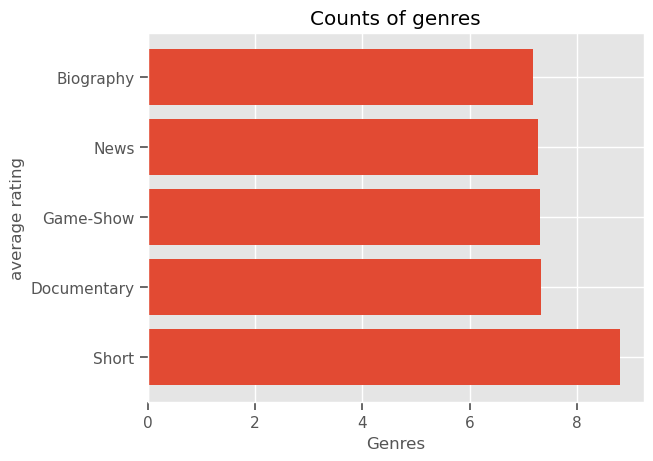

In [53]:
plt.style.use("ggplot")
group_by_genre_sort
group_by_genre_sort
plt.barh(group_by_genre_sort.index, group_by_genre_sort.values)
plt.title("Counts of genres")
plt.xlabel("Genres")
plt.ylabel("average rating")
sns.set_context("notebook");

short movies are the most rated movie genres. Then followed by Documentary , Gameshow genres

### Recommendations
- I will recommend Microsoft to focus on Drama, Then Documentary followed closely by Comedy Genres. The movie genres are likely to do well
- I would recommend Microsft to budget for genres that require high budget

- Microsoft should focus short type of movie genre because it highly rated


### Conclusion

Since these are just basic visualizations it is hard to fully evaluate the effectiveness of the recommendations
These recommendations also don't guarantee that a successful movie will be made. Just knowing what genres perform the best and that more should be spent on budget will only get you so far. Removing the outliers would have provided a more accurate Pearson's correlation coefficient for production budget vs worldwide gross. 